In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("billets.csv")
data = pd.DataFrame(data, columns=data.columns)

data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


# Mission 0

In [3]:
data.shape

(170, 7)

## Nettoyage

In [35]:
print(any(pd.isna(data)))
print(any(pd.isnull(data)))

#??????

True
True


<p> Des valeurs sont manquantes / Non attribuées

In [34]:
print("Les colonnes qui sont nulles :")
i = 0
while i <= 6:
    print(data.columns[i], any(pd.isnull(data.iloc[:,i])))
    i += 1

#Fonctionne aussi :
#i = 0
#while i <= 6:
#    isnull = data[pd.isnull(data.iloc[:,i])]
#    print(isnull)
#    i += 1
print("\n")
print("Les colonnes qui sont NaN :")
i = 0
while i <= 6:
    print(data.columns[i], any(pd.isna(data.iloc[:,i])))
    i += 1

Les colonnes qui sont nulles :
is_genuine False
diagonal False
height_left False
height_right False
margin_low False
margin_up False
length False


Les colonnes qui sont NaN :
is_genuine False
diagonal False
height_left False
height_right False
margin_low False
margin_up False
length False


## Analyses univariées

In [4]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [37]:
data[data.is_genuine == False].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
std,0.297426,0.213130,0.253152,0.540846,0.185102,0.676931
min,171.380000,103.780000,103.440000,3.820000,2.980000,109.970000
25%,171.682500,104.082500,103.982500,4.952500,3.185000,111.270000
50%,171.875000,104.215000,104.170000,5.265000,3.335000,111.765000
75%,172.047500,104.377500,104.280000,5.702500,3.450000,111.985000
max,173.010000,104.720000,104.860000,6.280000,3.680000,113.640000


In [38]:
data[data.is_genuine == True].describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200
std,0.307981,0.296251,0.292406,0.314509,0.197726,0.380476
min,171.040000,103.230000,103.140000,3.540000,2.270000,111.760000
25%,171.790000,103.740000,103.557500,3.900000,2.937500,112.995000
50%,172.005000,103.915000,103.760000,4.080000,3.070000,113.210000
75%,172.162500,104.145000,103.972500,4.382500,3.192500,113.505000
max,172.750000,104.860000,104.950000,5.040000,3.530000,113.980000


<p> Les minimums et maximums des valeurs True et False correspondent bien, nous ne pouvons rien déduire directement <br/>
(Si le maximum d'un True est inférieur au maximum d'un False alors nous cela aurait pu nous aider) </p>

<p> Il ne semble pas y avoir de valeur aberrantes de première abord ; Voyons avec des Histogrammes. </p>

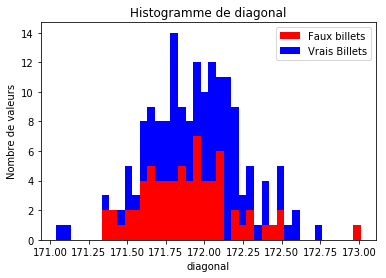

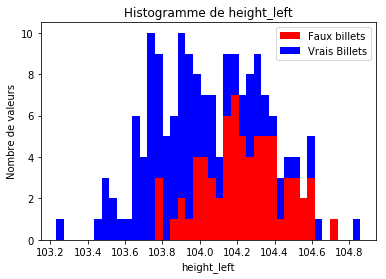

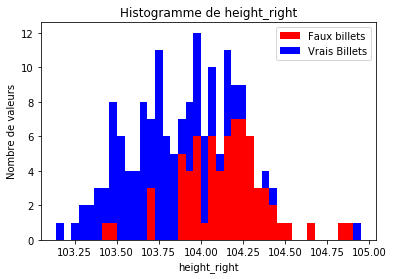

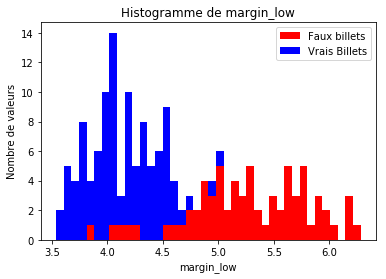

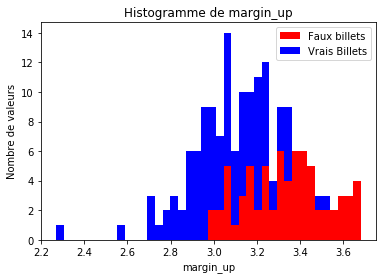

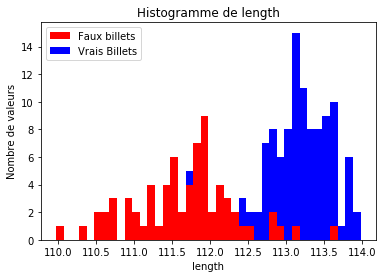

In [51]:
i = 1
while i <= 6:
    plt.hist([data.iloc[:,i][data.is_genuine == False], data.iloc[:,i][data.is_genuine == True]], 
             bins=(40), color = ["r", "b"],
             label=["Faux billets", "Vrais Billets"],
            histtype = 'barstacked')
    plt.title("Histogramme de {}".format(data.columns[i]))
    plt.xlabel(data.columns[i])
    plt.ylabel("Nombre de valeurs")
    plt.legend(loc="best")
    plt.show()
    i += 1

<p> Les colonnes Margin_low et Length se démarquent par leurs grandes différences entre les vrais et faux billets. </p>
<p> Si l'on décidait de se baser uniquement sur ces histogrammes pour détecter si un billet est vrai ou non, alors le programme ne serait pas satisfaisant ; <br/>
    En effet on peut voir que certains faux billets ont la même taille (en margin_low ou length) que les vrais billets, et inversement. Nous passerions donc à côté de faux billets. </p>